# Tier3 Classification Samples

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [14]:
from xview2comp.nb_03 import *

### Generate classification samples from Tier 3 data set

In [4]:
SOURCE = Path('data/tier3/images/')

In [8]:
fnames = get_image_files(SOURCE)
npreimgs = pre_img_fpaths(fnames)
nposimgs = [pre2post_fpath(o) for o in npreimgs]
nposlabs = [img2label_fpath(o) for o in nposimgs]

In [5]:
path_polyimgs = Path('data/tier3/classification_images')
path_csv = Path('class_labels_tier3.csv')
os.makedirs(path_polyimgs, exist_ok=True)

Takes about 40 minutes to generate classification samples from Tier 3 data set.

In [6]:
generate_classification_train(nposimgs, nposlabs, path_polyimgs, path_csv)

In [7]:
df = pd.read_csv('class_labels_tier3.csv')

In [11]:
df.damage.value_counts()

no-damage        116209
minor-damage      10744
destroyed         10335
un-classified      8751
major-damage       7288
Name: damage, dtype: int64

### How many samples are there in each category (damage level)?

In [10]:
nsets = ['train', 'tier3']

In [52]:
csvnames = [f'class_labels_{o}.csv' for o in nsets]
annots = pd.concat([pd.read_csv(o) for o in csvnames], axis=0)

Looks like the uids under 'train' and 'tier3' do not overlap, so we can move all the images to the same directory, to keep things simple, if we want to.

In [53]:
annots.uid.unique().shape, annots.shape

((316114,), (316114, 2))

In [54]:
annots = combine_nodamage_unclassified(annots)

It looks like the category 'no-damage/un-classified' has about ten times more samples than the other categories.

In [55]:
annots.damage.value_counts()

no-damage/un-classified    245379
minor-damage                25724
destroyed                   23562
major-damage                21449
Name: damage, dtype: int64

### Get all images' file name in a list

In [11]:
dirs = [Path('data')/o/'classification_images' for o in nsets]
fnames = [o_ for o in dirs for o_ in get_image_files(o)]

In [36]:
#export
@property
def get_image_area(o):
    w, h = o.size
    return w * h

Image.area = get_image_area

In [39]:
[open_image(o).area for o in fnames[:7]]

[3264, 9240, 754, 6016, 4284, 5994, 3944]

In [42]:
%%time
uids = [o.stem for o in fnames]

CPU times: user 276 ms, sys: 16 ms, total: 292 ms
Wall time: 290 ms


In [51]:
df_fnames = pd.DataFrame({'uid':uids, 'file':fnames})
df_fnames.head()

,uid,file
0,81c80fb6-b229-420c-9e4c-8fe32b126817,data/train/classification_images/81c80fb6-b229...
1,ee5059a0-b4c7-465d-a5cf-c31e2f015c1a,data/train/classification_images/ee5059a0-b4c7...
2,3b5f7043-9386-41ef-a3c7-ff5702d4622f,data/train/classification_images/3b5f7043-9386...
3,59646f2f-8085-4159-814a-840a01a69abf,data/train/classification_images/59646f2f-8085...
4,6fa1188a-af43-4c45-8398-27df8e1ea4ad,data/train/classification_images/6fa1188a-af43...


In [59]:
%%time
annots = pd.merge(annots, df_fnames, left_on='uid', right_on='uid', how='outer')

CPU times: user 352 ms, sys: 8 ms, total: 360 ms
Wall time: 541 ms


In [62]:
%%time
annots['area'] = annots.file.apply(lambda o: open_image(o).area)

CPU times: user 10min 5s, sys: 42.9 s, total: 10min 48s
Wall time: 5min 55s


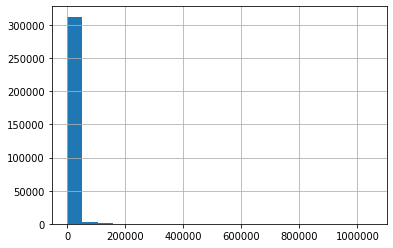

In [66]:
annots.area.hist(bins=20)

In [76]:
annots[annots.area > 1000000]

,damage,uid,file,area
5991,major-damage,e0be2929-6962-4fd5-be2c-e3e441ed390e,data/train/classification_images/e0be2929-6962...,1048576
8844,no-damage/un-classified,580aa08d-872f-43bd-a23c-e11187ab722a,data/train/classification_images/580aa08d-872f...,1048576
159642,no-damage/un-classified,ac931ed3-508f-4059-afa8-49ada9d86e02,data/train/classification_images/ac931ed3-508f...,1014784
162037,no-damage/un-classified,529fbc55-a095-4b6a-a8f7-9cc9a93a5b44,data/train/classification_images/529fbc55-a095...,1048576
229746,no-damage/un-classified,12bcd84a-e16b-4c64-b063-75d3c46047d0,data/tier3/classification_images/12bcd84a-e16b...,1048576


In [83]:
sz_full = 1024**2

In [84]:
annots_frac1 = annots[annots.area > sz_full / 2**1]

In [88]:
annots_frac2 = annots[annots.area > sz_full / 2**2]

In [92]:
annots_frac3 = annots[annots.area > sz_full / 2**3]

In [93]:
annots_frac1.shape, annots_frac2.shape, annots_frac3.shape

((44, 4), (193, 4), (687, 4))

These do not look like a valid polygon image...
`annots_frac1`:
`annots_frac2`:
`annots_frac3`: 340

no-damage/un-classified


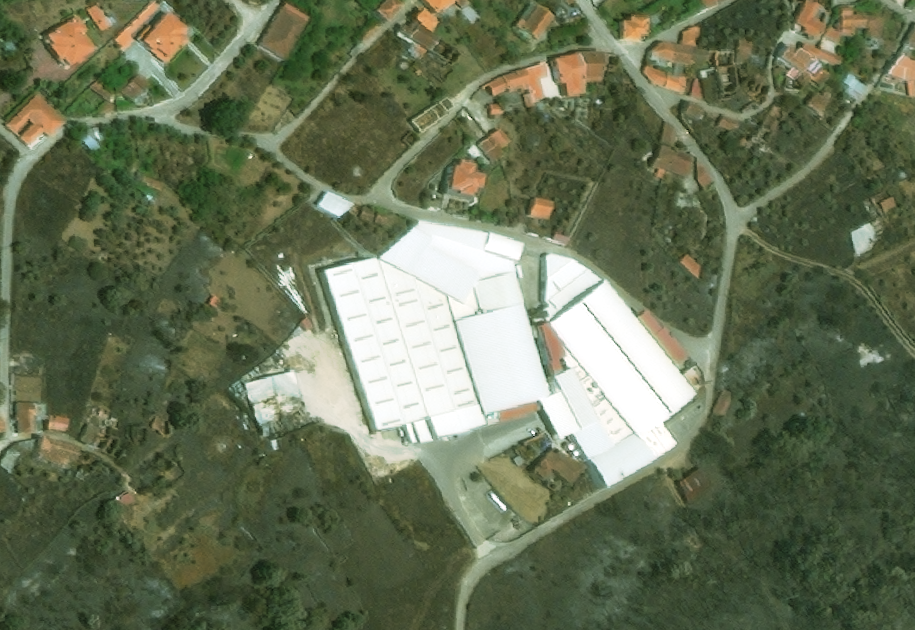

In [113]:
idx = 28
print(annots_frac1.iloc[idx].damage)
open_image(annots_frac1.iloc[idx].file)

# -fin